In [26]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_openml
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.multioutput import MultiOutputClassifier
from sklearn.linear_model import LogisticRegression
import seaborn as sns
import matplotlib.pyplot as plt

In [28]:
yeast = fetch_openml(name='yeast',version=4,as_frame=True,parser='auto')
X = yeast.data
y = yeast.target

# Preprocessing and understanding the data

In [31]:
X.head()

,Att1,Att2,Att3,Att4,Att5,Att6,Att7,Att8,Att9,Att10,...,Att94,Att95,Att96,Att97,Att98,Att99,Att100,Att101,Att102,Att103
0,0.004168,-0.170975,-0.156748,-0.142151,0.058781,0.026851,0.197719,0.041850,0.066938,-0.056617,...,0.006166,-0.012976,-0.014259,-0.015024,-0.010747,0.000411,-0.032056,-0.018312,0.030126,0.124722
1,-0.103956,0.011879,-0.098986,-0.054501,-0.007970,0.049113,-0.030580,-0.077933,-0.080529,-0.016267,...,0.007680,0.027719,-0.085811,0.111123,0.050541,0.027565,-0.063569,-0.041471,-0.079758,0.017161
2,0.509949,0.401709,0.293799,0.087714,0.011686,-0.006411,-0.006255,0.013646,-0.040666,-0.024447,...,0.096277,-0.044932,-0.089470,-0.009162,-0.012010,0.308378,-0.028053,0.026710,-0.066565,-0.122352
3,0.119092,0.004412,-0.002262,0.072254,0.044512,-0.051467,0.074686,-0.007670,0.079438,0.062184,...,-0.083809,0.200354,-0.075716,0.196605,0.152758,-0.028484,-0.074207,-0.089227,-0.049913,-0.043893
4,0.042037,0.007054,-0.069483,0.081015,-0.048207,0.089446,-0.004947,0.064456,-0.133387,0.068878,...,-0.060467,0.044351,-0.057209,0.028047,0.029661,-0.050026,0.023248,-0.061539,-0.035160,0.067834


In [33]:
y.head()

,Class1,Class2,Class3,Class4,Class5,Class6,Class7,Class8,Class9,Class10,Class11,Class12,Class13,Class14
0,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,TRUE,TRUE,FALSE,FALSE,FALSE,TRUE,TRUE,FALSE
1,FALSE,FALSE,TRUE,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
2,FALSE,TRUE,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,TRUE,TRUE,FALSE
3,FALSE,FALSE,TRUE,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
4,FALSE,FALSE,TRUE,TRUE,TRUE,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE


In [35]:
X.isnull().sum()

Att1      0
Att2      0
Att3      0
Att4      0
Att5      0
         ..
Att99     0
Att100    0
Att101    0
Att102    0
Att103    0
Length: 103, dtype: int64

In [37]:
y.isnull().sum()

Class1     0
Class2     0
Class3     0
Class4     0
Class5     0
Class6     0
Class7     0
Class8     0
Class9     0
Class10    0
Class11    0
Class12    0
Class13    0
Class14    0
dtype: int64

In [39]:
X.describe()

,Att1,Att2,Att3,Att4,Att5,Att6,Att7,Att8,Att9,Att10,...,Att94,Att95,Att96,Att97,Att98,Att99,Att100,Att101,Att102,Att103
count,2417.000000,2417.000000,2417.000000,2417.000000,2417.000000,2417.000000,2417.000000,2417.000000,2417.000000,2417.000000,...,2417.000000,2417.000000,2417.000000,2417.000000,2417.000000,2417.000000,2417.000000,2417.000000,2417.000000,2417.000000
mean,0.001173,-0.000436,-0.000257,0.000265,0.001228,0.000475,0.001107,0.000420,0.001076,-0.000009,...,-0.000773,0.000464,-0.000515,0.000667,0.000324,-0.001483,-0.001047,-0.001539,0.000284,0.007605
std,0.097411,0.097885,0.097746,0.096969,0.096909,0.097306,0.097170,0.096803,0.096326,0.096805,...,0.093316,0.096684,0.096209,0.096635,0.096280,0.094369,0.096900,0.094211,0.093154,0.099368
min,-0.371146,-0.472632,-0.339195,-0.467945,-0.367044,-0.509447,-0.319928,-0.594498,-0.369712,-0.767128,...,-0.455191,-0.283594,-0.279408,-0.226420,-0.225374,-0.501572,-0.236589,-0.267052,-0.194079,-0.237752
25%,-0.053655,-0.058734,-0.057526,-0.057149,-0.058461,-0.060212,-0.058445,-0.062849,-0.063472,-0.065010,...,-0.054133,-0.056415,-0.056414,-0.059382,-0.058025,-0.053591,-0.063318,-0.059542,-0.054078,-0.077191
50%,0.003649,-0.003513,0.002892,-0.000153,0.005565,0.000321,0.006179,0.001436,0.003515,0.002432,...,-0.012893,-0.023595,-0.024313,-0.023059,-0.021942,-0.018216,-0.033623,-0.023519,-0.012007,0.022126
75%,0.057299,0.048047,0.061007,0.054522,0.066286,0.059908,0.068892,0.061418,0.064958,0.063096,...,0.027977,0.034937,0.036057,0.041430,0.035730,0.019583,0.038901,0.025408,0.028087,0.103185
max,0.520272,0.614114,0.353241,0.568960,0.307649,0.336971,0.351401,0.454591,0.419852,0.420876,...,0.609175,0.542867,0.547134,0.385928,0.540493,0.569250,0.509963,0.587358,0.700340,0.163431


### From the descriptive analysis, it is evident that the dataset is already scaled within the range of -1 to 1. As a result, no further normalization of the data is necessary. Additionally, there are no null values present in either the feature matrix (X) or the target variable (y).

### Given this, we can proceed directly to implementing the multilabel classification model.

### To prepare the target variable y for multilabel classification, we will convert the True values to 1 and the False values to 0. This will create binary labels for each class, where 1 represents the presence of that class and 0 indicates its absence.

In [43]:
y = y.astype(str).applymap(lambda x: 1 if x == 'TRUE' else 0) # Convert to string type before applying the lambda function

In [45]:
y.head()

,Class1,Class2,Class3,Class4,Class5,Class6,Class7,Class8,Class9,Class10,Class11,Class12,Class13,Class14
0,0,0,0,0,0,0,1,1,0,0,0,1,1,0
1,0,0,1,1,0,0,0,0,0,0,0,0,0,0
2,0,1,1,0,0,0,0,0,0,0,0,1,1,0
3,0,0,1,1,0,0,0,0,0,0,0,0,0,0
4,0,0,1,1,1,1,0,0,0,0,0,0,0,0


In [47]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [49]:
model = MultiOutputClassifier(LogisticRegression(solver='lbfgs', max_iter=1000))
model.fit(X_train, y_train)

MultiOutputClassifier(estimator=LogisticRegression(max_iter=1000))

In [50]:
y_pred = model.predict(X_test)

### Accuraccy per label

In [54]:
print("Accuracy per label:")
for i, label in enumerate(yeast.target_names):
    print(f"{label} Accuracy: {accuracy_score(y_test.iloc[:, i], y_pred[:, i]):.2f}")

Accuracy per label:
Class1 Accuracy: 0.78
Class2 Accuracy: 0.64
Class3 Accuracy: 0.74
Class4 Accuracy: 0.74
Class5 Accuracy: 0.75
Class6 Accuracy: 0.76
Class7 Accuracy: 0.84
Class8 Accuracy: 0.83
Class9 Accuracy: 0.94
Class10 Accuracy: 0.88
Class11 Accuracy: 0.87
Class12 Accuracy: 0.76
Class13 Accuracy: 0.76
Class14 Accuracy: 0.99


### The classification report

In [57]:
print("\nClassification Report for each label:")
for i, label in enumerate(yeast.target_names):
    print(f"\n{label} Classification Report:\n", classification_report(y_test.iloc[:, i], y_pred[:, i], zero_division=1))


Classification Report for each label:

Class1 Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.95      0.85       317
           1       0.82      0.46      0.58       167

    accuracy                           0.78       484
   macro avg       0.79      0.70      0.72       484
weighted avg       0.78      0.78      0.76       484


Class2 Classification Report:
               precision    recall  f1-score   support

           0       0.65      0.77      0.71       273
           1       0.61      0.47      0.53       211

    accuracy                           0.64       484
   macro avg       0.63      0.62      0.62       484
weighted avg       0.63      0.64      0.63       484


Class3 Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.80      0.78       288
           1       0.68      0.65      0.66       196

    accuracy                           0.74    

### The confusion matrix

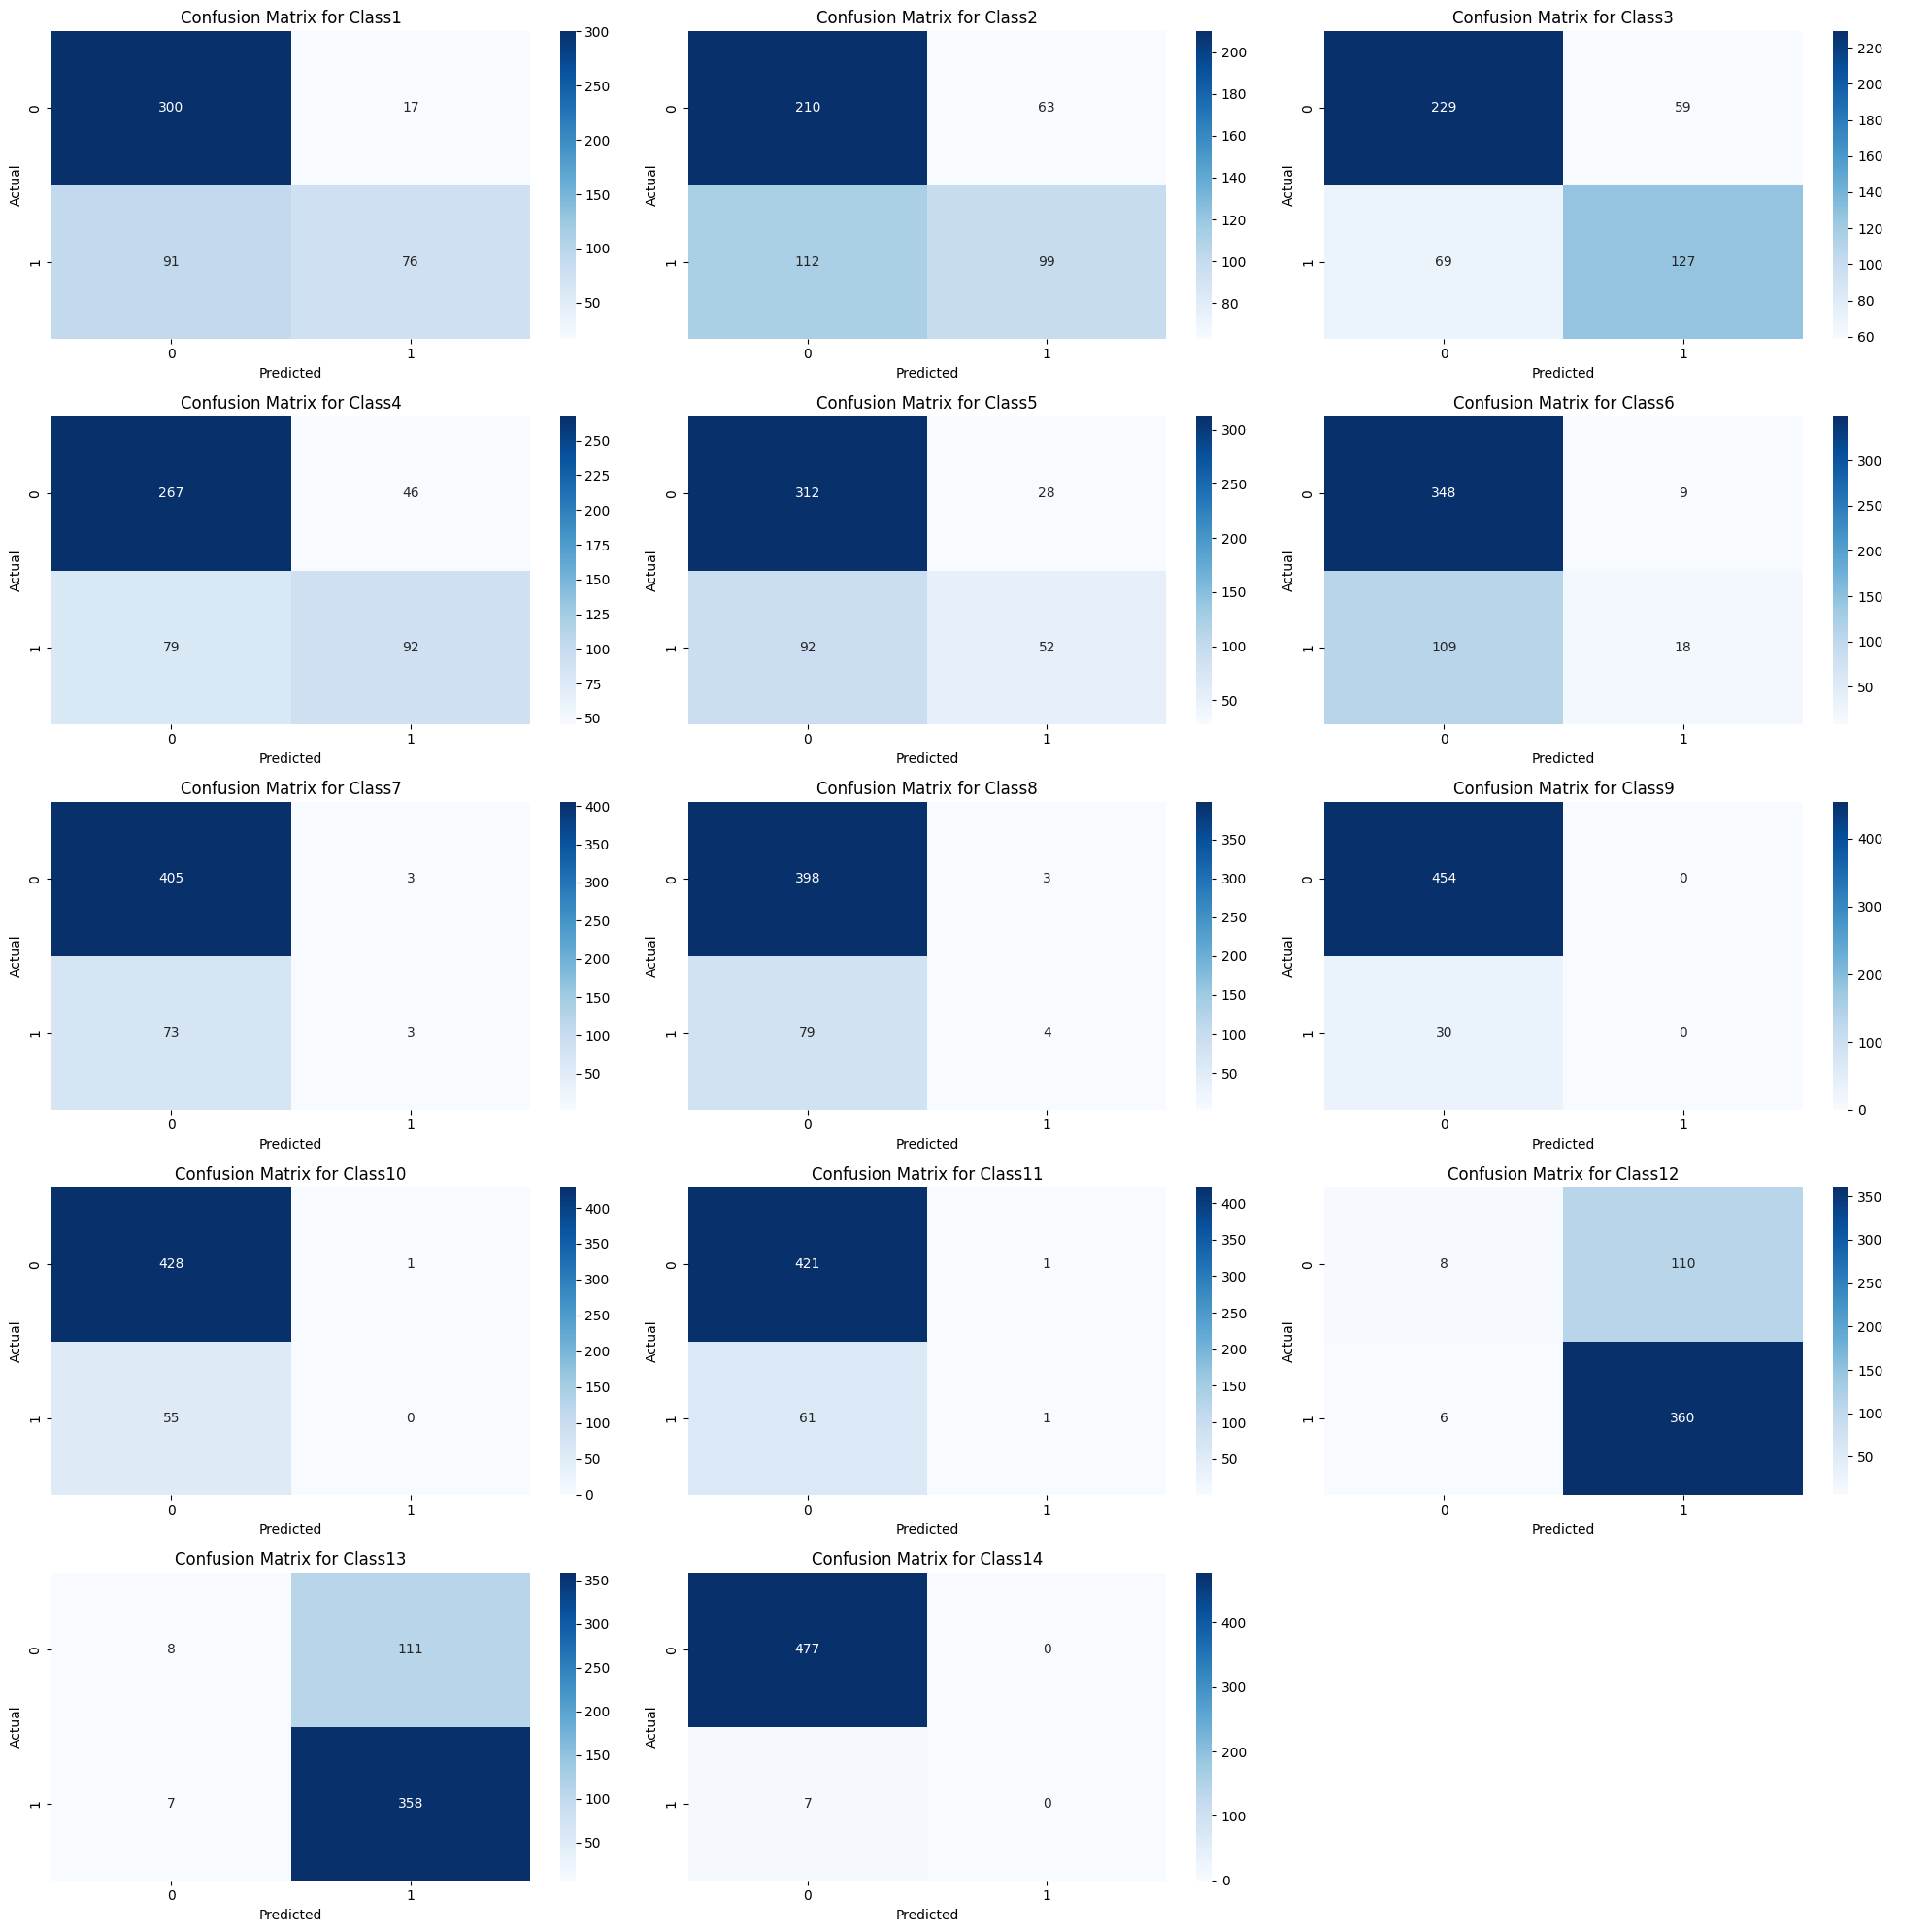

In [62]:
fig, axes = plt.subplots(5, 3, figsize=(20, 20))

for i, ax in enumerate(axes.flat):
    if i < 14:
        sns.heatmap(confusion_matrix(y_test.iloc[:, i], y_pred[:, i]), ax=ax, annot=True, cmap="Blues", fmt='g')
        ax.set_xlabel("Predicted")
        ax.set_ylabel("Actual")
        ax.set_title(f"Confusion Matrix for {y_test.columns[i]}")
    else:
        ax.axis('off')

plt.tight_layout()
plt.show()